In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df1 = pd.read_csv("Players_Medal_List_Asian.csv")
df2 = pd.read_csv("Medal_List_Asian.csv")
df3 = pd.read_csv("Players_Medal_List_Olympics.csv")
df4 = pd.read_csv("Medal_List_Olympics.csv")

# Number Events for Male and Female over the years

In [22]:
#Get list of events genderwise
def get_events(df, gender = "All"):
    if gender != "All":
        df = df[df["Gender"] == gender]
    
    events = df.groupby(["Event", "Gender", "Country", "Year", "Sport", "Sport_Type", "Gold", "Silver", "Bronze"], as_index = False).agg("sum")
    events = events.groupby(["Event", "Gender", "Year", "Sport", "Sport_Type"], as_index = False).agg("sum")
    return events

In [23]:
def plotBar(x, y, labels, xlabel = "", ylabel = "", title = "", figs = (15,10), barlabel = False):
    fig, ax = plt.subplots(figsize = figs)
    width = 1.0/(len(y)+2)
    x_axis = np.arange(len(x))
    p = []
    for idx,y_axis in enumerate(y):
        p.append(ax.bar(x_axis + idx*width, y_axis, width, label=labels[idx]))

    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x_axis + width/len(y))
    ax.set_xticklabels(x, rotation = 90)
    ax.legend()

    if barlabel:
        for i in p:
            ax.bar_label(i, label_type='edge')

    plt.show()

In [24]:
def plotLine(x, y, labels, xlabel = "", ylabel = "", title = "", figs = (15,10), barlabel = False):
    fig, ax = plt.subplots(figsize = figs)
    width = 1.0/(len(y)+2)
    x_axis = np.arange(len(x))
    p = []
    for idx,y_axis in enumerate(y):
        p.append(ax.plot(x_axis, y_axis, 'o-', linewidth = 2, label = labels[idx]))

    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x_axis)
    ax.set_xticklabels(x, rotation = 90)
    ax.legend()

    if barlabel:
        for i in p:
            ax.bar_label(i, label_type='edge')

    plt.show()

## Asian

In [25]:
event_F = get_events(df1, "F")
event_M = get_events(df1, "M")

In [26]:
x_axis_A = pd.unique(df1["Year"])
y_axis_f_A = [len(event_F[event_F["Year"] == y]) for y in x_axis_A]
y_axis_m_A = [len(event_M[event_M["Year"] == y]) for y in x_axis_A]
xlabel = "Years"
ylabel = "No of events"
title = "No of events of male and female over the years in Asian Games"

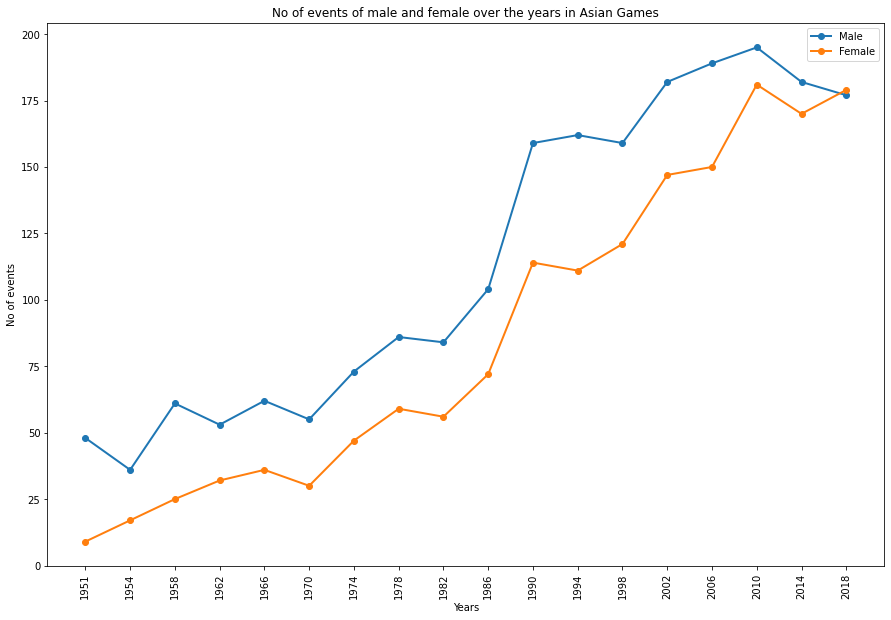

In [27]:
plotLine(x_axis_A, [y_axis_m_A, y_axis_f_A], ["Male", "Female"], xlabel, ylabel, title)

# Number of medals(M/F)

## Olympics

In [28]:
events = df3.groupby(["Event", "Gender", "Country", "Year", "Sport", "Sport_Type", "Gold", "Silver", "Bronze"], as_index = False).agg("sum")
events_m = events[events["Gender"] == "M"]
events_f = events[events["Gender"] == "F"]

In [29]:
x_axis_O = pd.unique(df3["Year"])
y_axis_f_O = [len(events_f[events_f["Year"] == y]) for y in x_axis_O]
y_axis_m_O = [len(events_m[events_m["Year"] == y]) for y in x_axis_O]
xlabel = "Years"
ylabel = "No of events"
title = "No of Medals won by male and female over the years in Olympics"

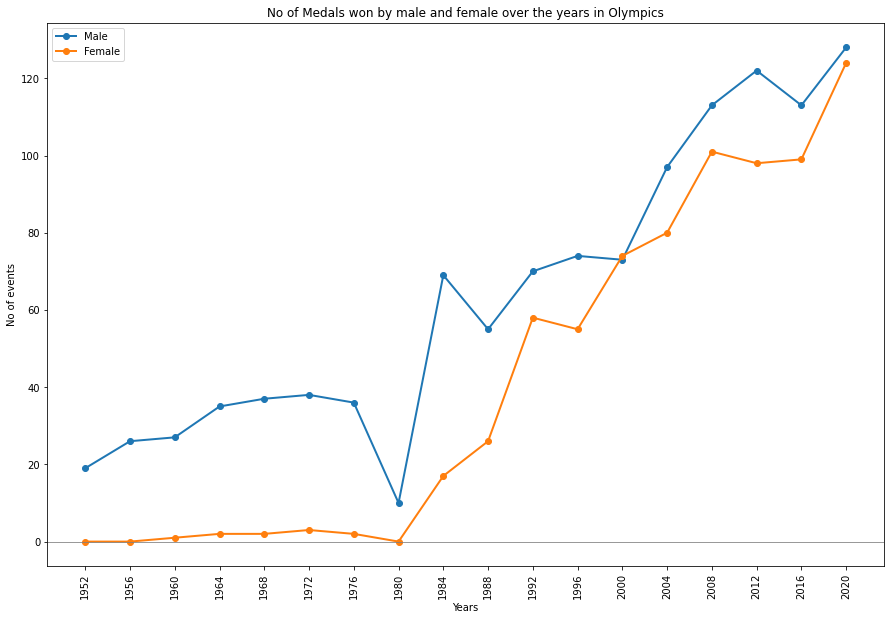

In [30]:
plotLine(x_axis_O, [y_axis_m_O, y_axis_f_O], ["Male", "Female"], xlabel, ylabel, title)

The first graph shows the number of events for male and female athletes over the years in Asian games. The second graph shows the number of medals won by Asian male and female athletes in Olympics from 1952(After asian games have started). Here, we can see that increasing games for male and female in asian games also increases the number of medals won in Olympics by male and female. Also, we can see the gap between medals won in Olympics decreases as the gap between number of games in Asian games decreases.

# Countrywise Medal Ratios of male and female

This function country-wise male-medal percentage and female-medal percentage.

In [31]:
def m_f_winning_ratio_countrywise(df_p, game, year = "Overall", sport = "Overall", medal = "Total"):
    if year != "Overall":
        df_p = df_p[df_p["Year"] == year]
    if sport != "Overall":
        df_p = df_p[df_p["Sport"] == sport]
    
    events = df_p.groupby(["Event", "Gender", "Country", "Year", "Sport", "Sport_Type", "Gold", "Silver", "Bronze"], as_index = False).agg("sum")
    events = events.groupby(["Country", "Event", "Gender", "Year", "Sport", "Sport_Type"], as_index = False).agg("sum")
    tot = [(row["Gold"] + row["Silver"] + row["Bronze"]) for idx, row in events.iterrows()]
    events["Total"] = tot
    
    #total medals
    tot_m = events[events["Gender"] == "M"][medal].sum()
    tot_f = events[events["Gender"] == "F"][medal].sum()
    
    countries = pd.unique(events["Country"]).tolist()
    
    #%medals won by males country-wise
    tot_m_c = []
    for country in countries:
        if tot_m == 0:
            tot_m_c.append(0)
            continue
        temp = events[(events["Country"] == country) & (events["Gender"] == "M")]
        tot = temp[medal].sum()
        tot_m_c.append(round(tot/tot_m * 100, 1))
    
    #%medals won by females country-wise
    tot_f_c = []
    for country in countries:
        if tot_f == 0:
            tot_f_c.append(0)
            continue
        temp = events[(events["Country"] == country) & (events["Gender"] == "F")]
        tot = temp[medal].sum()
        tot_f_c.append(round(tot/tot_f * 100, 1))
    
    #Ploting Graph
    fsize = (20,10)
    #if nation != "Overall":
     #   idx = countries.index(nation)
      #  countries = [countries[idx]]
       # tot_m_c = tot_m_c[idx]
       # tot_f_c = tot_f_c[idx]
       # fsize = (5,5)
    
    xlabel = "Countries"
    ylabel = "Percentage of medals"
    
    if year == "Overall":
        pyear = ""
    else:
        pyear = "in the year " + str(year)
    
    if sport == "Overall":
        psport = ""
    else:
        psport = " " + sport
    
    title = f"Percentage of {medal} Medals won by Male and Female Country-wise in{psport} {game} {pyear}"
    
    output = {"Country": countries, "Male-Medal-Percent": tot_m_c, "Female-Medal-Percent": tot_f_c}
    output = pd.DataFrame(output)
    output.sort_values(by=['Male-Medal-Percent', 'Female-Medal-Percent', 'Country'], ignore_index = True, ascending=False, inplace = True)
    if len(output) > 15:
        m_c = 0
        f_c = 0
        for i in range(15, len(output)):
            m_c += output["Male-Medal-Percent"][i]
            f_c += output["Female-Medal-Percent"][i]
        output.drop([i for i in range(15, len(output))], inplace = True)
        output.loc[len(output.index)] = ['Others', m_c, f_c]
        
    
    plotBar(output["Country"], [output["Male-Medal-Percent"], output["Female-Medal-Percent"]], ["Male", "Female"], xlabel, ylabel, title, figs = fsize, barlabel = True)
    
    #Table to return for output
    events = events[events["Gender"] != "Unknown"]
    cols = ["Country", "Gender"]
    
    if year != "Overall":
        cols.append("Year")
    if sport != "Overall":
        cols.append("Sport")
    
    events = events.groupby(cols, as_index = False).agg("sum")
    if year == "Overall":
        events = events.drop("Year", axis = 1)
        
    return events

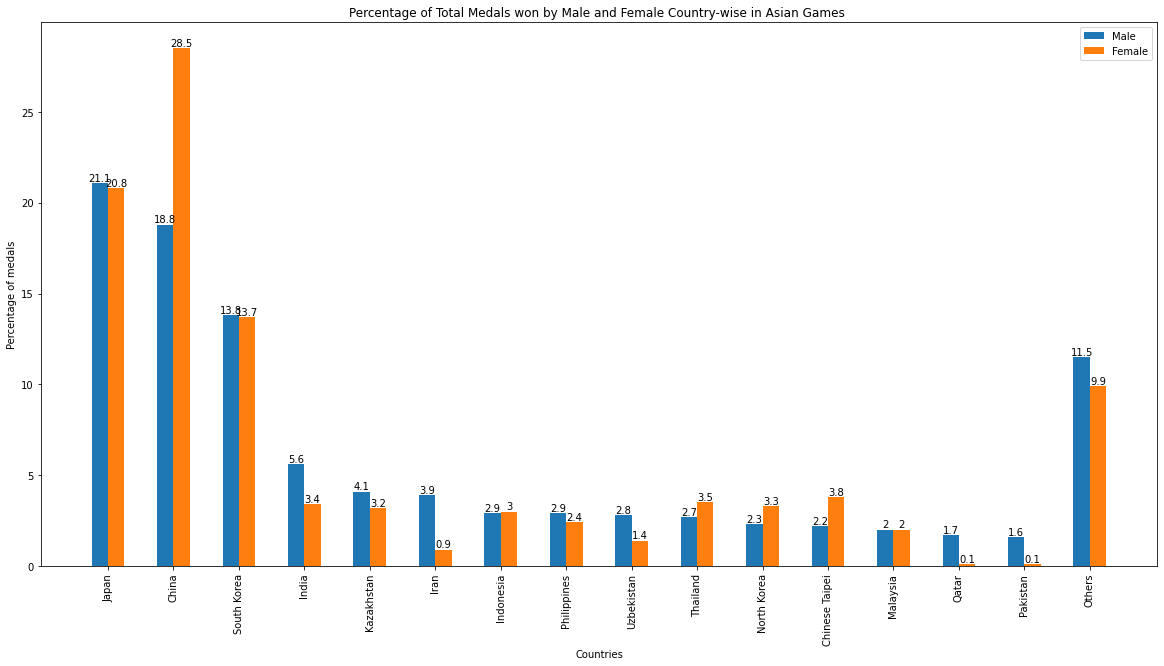

,Country,Gender,Gold,Silver,Bronze,Total
0,Afghanistan,F,0,0,1,1
1,Afghanistan,M,0,3,4,7
2,Bahrain,F,19,7,7,33
3,Bahrain,M,16,13,13,42
4,Bangladesh,F,0,2,2,4
...,...,...,...,...,...,...
86,Uzbekistan,F,15,23,29,67
87,Uzbekistan,M,33,59,83,175
88,Vietnam,F,8,27,28,63
89,Vietnam,M,1,17,26,44


In [32]:
m_f_winning_ratio_countrywise(df1, "Asian Games")

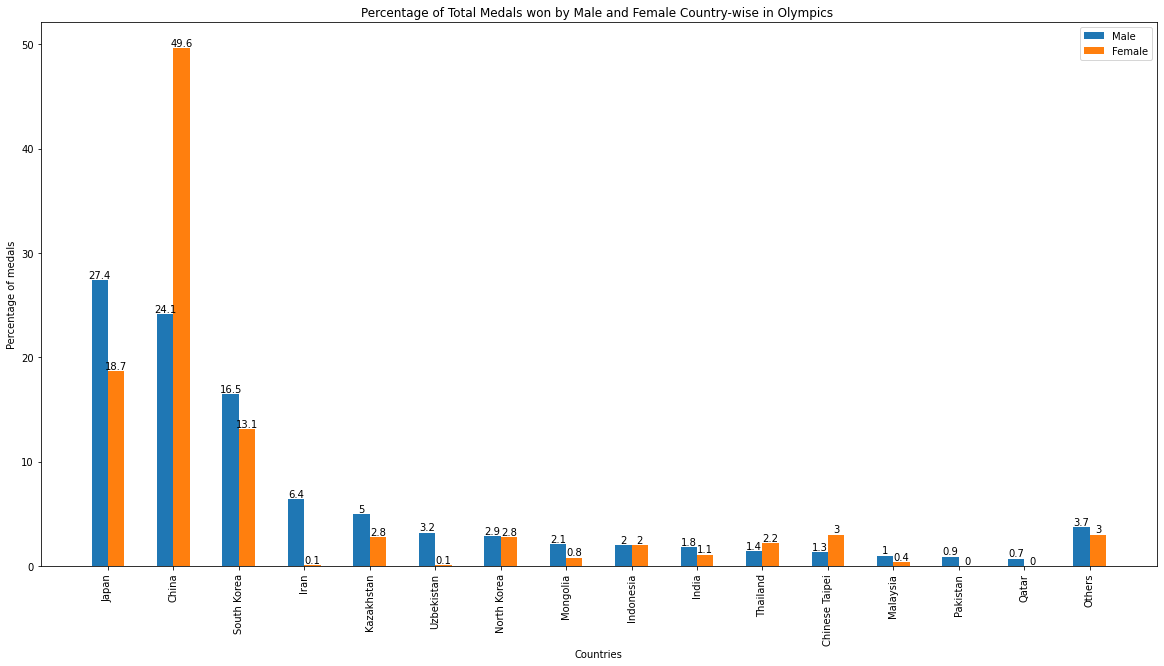

,Country,Gender,Gold,Silver,Bronze,Total
0,Afghanistan,M,0,0,2,2
1,Bahrain,F,1,2,1,4
2,China,F,153,116,99,368
3,China,M,118,82,75,275
4,Chinese Taipei,F,3,4,15,22
5,Chinese Taipei,M,2,7,6,15
6,Hong Kong,F,1,2,4,7
7,Hong Kong,M,1,1,0,2
8,India,F,0,2,6,8
9,India,M,6,5,10,21


In [33]:
m_f_winning_ratio_countrywise(df3, "Olympics")

Here, we can see that Japan's men have won most men medals in asian games, and they also won most men medals in olympics. Similarly, China's female have won most female medals in asian games, and they also have won most female medals in olympics. So we can clearly see that the countries with best performance of male and female atheletes in Asian games also performs well in Olympics.

We can find the countries from the graph, where females have better performance than males, as a country having more female-medal percent means that females have secured more medals in their eligible games than male in their games.

The table shows the count of medals country-wise for male and female.

# Yearwise Medal Ratio of Male and Female for a Country

This function year-wise male-medal percentage and female-medal percentage of a country.

In [34]:
def m_f_winning_ratio_yearwise(df_p, game, nation, sport = "Overall", medal = "Total"):
    if sport != "Overall":
        df_p = df_p[df_p["Sport"] == sport]
    
    events = df_p.groupby(["Event", "Gender", "Country", "Year", "Sport", "Sport_Type", "Gold", "Silver", "Bronze"], as_index = False).agg("sum")
    events = events.groupby(["Event", "Country", "Gender", "Year", "Sport", "Sport_Type"], as_index = False).agg("sum")
    tot = [(row["Gold"] + row["Silver"] + row["Bronze"]) for idx, row in events.iterrows()]
    events["Total"] = tot
    
    years = pd.unique(events["Year"]).tolist()
    years.sort()
    
    #percentage-medals won by males of the country year-wise
    tot_m_y = []
    for year in years:
        temp = events[(events["Year"] == year) & (events["Gender"] == "M")]
        #total medals of men for a year
        tot = temp[medal].sum()
        if tot == 0:
            tot_m_y.append(0)
            continue
        
        temp = temp[temp["Country"] == nation]
        tot_c = temp[medal].sum()
        tot_m_y.append(round(tot_c/tot * 100, 1))
    
    
    #percentage-medals won by females of the country year-wise
    tot_f_y = []
    for year in years:
        temp = events[(events["Year"] == year) & (events["Gender"] == "F")]
        #total medals of women for a year
        tot = temp[medal].sum()
        if tot == 0:
            tot_f_y.append(0)
            continue
        
        temp = temp[temp["Country"] == nation]
        tot_c = temp[medal].sum()
        tot_f_y.append(round(tot_c/tot * 100, 1))
    
    #Ploting Graph
    fsize = (20,10)
    
    xlabel = "Years"
    ylabel = "Percentage of medals"
    
    if sport == "Overall":
        psport = ""
    else:
        psport = f' {sport} of'
    
    title = f"Percentage of {medal} Medals won by Male and Female of {nation} in{psport} {game} over the Years"
    plotLine(years, [tot_m_y, tot_f_y], ["Male-Medal Percent", "Female-Medal Percent"], xlabel, ylabel, title, figs = fsize)
    
    #Table to return for output
    events = events[events["Gender"] != "Unknown"]
    cols = ["Country", "Year", "Gender"]
    
    if sport != "Overall":
        cols.append("Sport")
    
    events = events.groupby(cols, as_index = False).agg("sum")
    
    events = events[events["Country"] == nation]
    
    return events

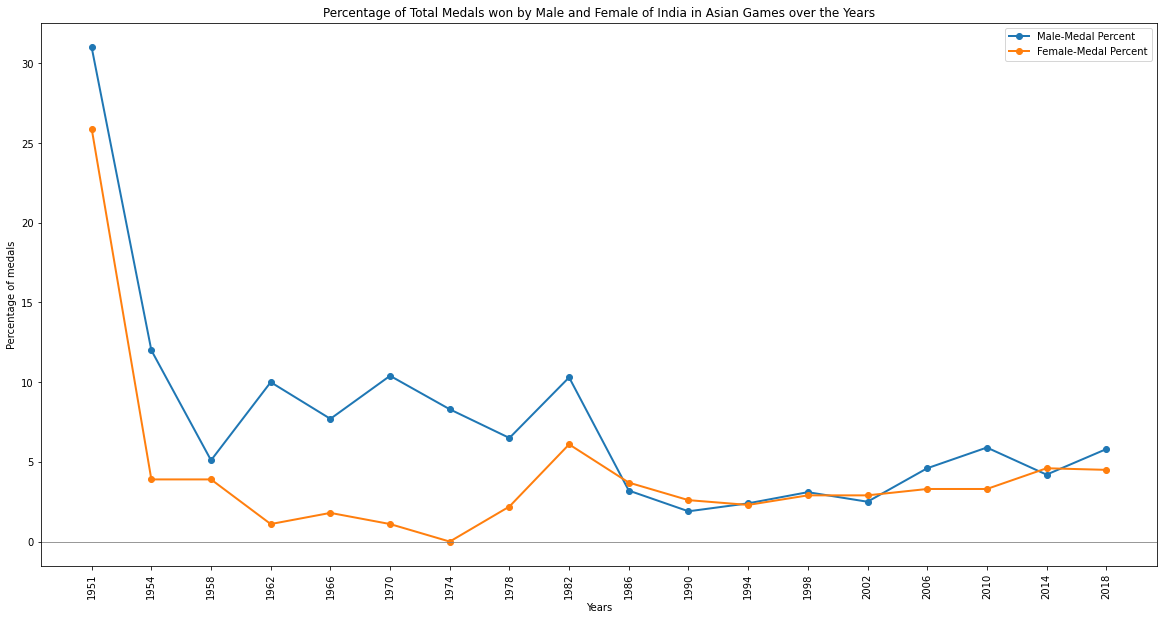

,Country,Year,Gender,Gold,Silver,Bronze,Total
107,India,1951,F,0,2,5,7
108,India,1951,M,15,14,15,44
109,India,1954,F,1,0,1,2
110,India,1954,M,4,3,6,13
111,India,1958,F,0,2,1,3
112,India,1958,M,5,1,3,9
113,India,1962,F,0,0,1,1
114,India,1962,M,6,7,3,16
115,India,1966,F,0,0,2,2
116,India,1966,M,6,2,6,14


In [35]:
m_f_winning_ratio_yearwise(df1, "Asian Games", "India")

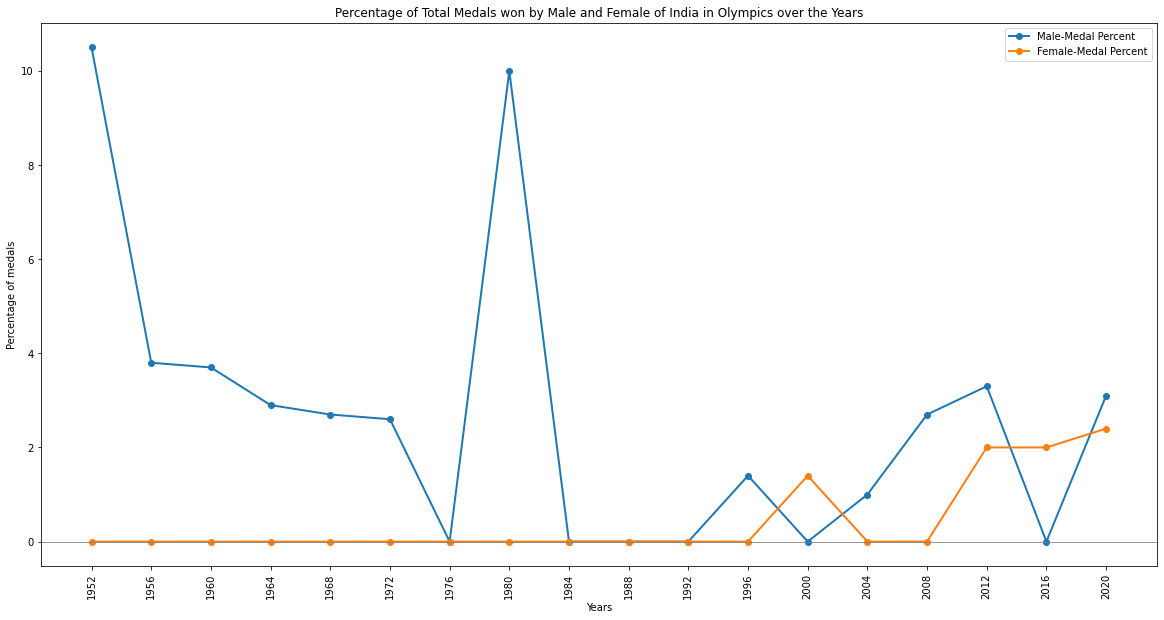

,Country,Year,Gender,Gold,Silver,Bronze,Total
45,India,1952,M,1,0,1,2
46,India,1956,M,1,0,0,1
47,India,1960,M,0,1,0,1
48,India,1964,M,1,0,0,1
49,India,1968,M,0,0,1,1
50,India,1972,M,0,0,1,1
51,India,1980,M,1,0,0,1
52,India,1996,M,0,0,1,1
53,India,2000,F,0,0,1,1
54,India,2004,M,0,1,0,1


In [36]:
m_f_winning_ratio_yearwise(df3, "Olympics", "India")

Graph shows the male-medal percent and women-medal percent. 

For most of the countries, when females start performing better in asian games, they also perform better in olympics and vice-versa. Same for male. For e.g, China started winning medals in Asian games from year 1974, and their first olympics medals is from 1984. And most of the time, female outperformed males of China in Asian games, and that can be seen in Olympics as well.

Table shows the count of medals for males and females year-wise for the selected country.